In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas experiments
Pandas are an acquired taste. This document contains some demonstrations and experiments that create and manipulate
Panda datastructures (Serie, Dataset)

# Series

## Creating

In [2]:
serie1 = pd.Series([1,2,3,4])
serie1

0    1
1    2
2    3
3    4
dtype: int64

In [3]:
serie2 = pd.Series({'a':1, 'b':2, 'c':3})
serie2


a    1
b    2
c    3
dtype: int64

# DataFrame

## Creating

In [4]:
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


## Reading a CSV file

In [5]:
csv = pd.read_csv("data/stats_weekofyear.gz")

csv.head()

,year,weekofyear,all,ano,ident,inclass,teacher
0,2015,53,169,143,19,7,0
1,2016,1,2483,1897,455,124,7
2,2016,2,2901,1758,793,333,17
3,2016,3,2204,1558,463,167,16
4,2016,4,2551,1726,421,379,25


## Some Selections (create a series)

In [9]:
s = csv['all']
s

0       169
1      2483
2      2901
3      2204
4      2551
       ... 
180    2553
181    2598
182    3150
183    2328
184    3449
Name: all, Length: 185, dtype: int64

## Grouping


In [7]:
gcsv = csv.groupby(['year', 'weekofyear']).sum()
gcsv

all   ano  ident  inclass  teacher
year weekofyear                                     
2015 53           169   143     19        7        0
2016 1           2483  1897    455      124        7
     2           2901  1758    793      333       17
     3           2204  1558    463      167       16
     4           2551  1726    421      379       25
...               ...   ...    ...      ...      ...
2019 45          2553  1479    732      324       18
     46          2598  1387    830      348       33
     47          3150  1463   1053      623       11
     48          2328  1063    933      321       11
     49          3449  1484   1038      897       30

[185 rows x 5 columns]

## Pivotting

In [20]:
pcsv = csv.pivot(index='weekofyear', columns='year', values='all')
pcsv

year,2015,2016,2017,2018,2019
weekofyear,,,,,
1,NaN,2483.0,816.0,552.0,602.0
2,NaN,2901.0,1198.0,2002.0,3472.0
3,NaN,2204.0,998.0,1878.0,3913.0
4,NaN,2551.0,1651.0,2044.0,3823.0
5,NaN,2481.0,1739.0,2611.0,3798.0
6,NaN,1737.0,1578.0,2607.0,3658.0
7,NaN,2127.0,1827.0,2680.0,3668.0
8,NaN,2044.0,1405.0,2903.0,2799.0
9,NaN,1973.0,932.0,2504.0,3112.0


ValueError: shape mismatch: objects cannot be broadcast to a single shape

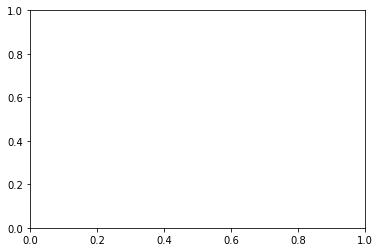

In [34]:
y2016 = pcsv[2016].tolist()
y2017 = pcsv[2017].tolist()
y2018 = pcsv[2018].tolist()
y2019 = pcsv[2019].tolist()

x = np.arange(4)
width = 0.35

fig, ax = plt.subplots()
bar2016 = ax.bar(x - 2*(width/4), y2016, width, label='2016')
bar2017 = ax.bar(x - (width/4), y2017, width, label='2017')
bar2018 = ax.bar(x + (width/4), y2018, width, label='2018')
bar2019 = ax.bar(x + (2*width/4), y2019, width, label='2019')

plt.show
p1 = y2019.plot(kind='bar')

## plotting

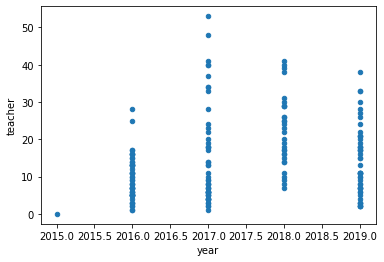

In [8]:
csv.plot(kind='scatter', x='year', y='teacher')

In [21]:
# pcsv.plot(lind='line', x='year', y='all')